In [1]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import * #BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
train_path = 'CarneDataset/train'
test_path = 'CarneDataset/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08'], batch_size=10)

Found 1633 images belonging to 8 classes.


In [4]:
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08'], batch_size=4)

Found 810 images belonging to 8 classes.


In [5]:
def plots(ims, figsize=(20,6), rows=2, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [6]:
imgs, labels = next(train_batches)

C:\Users\andre\anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


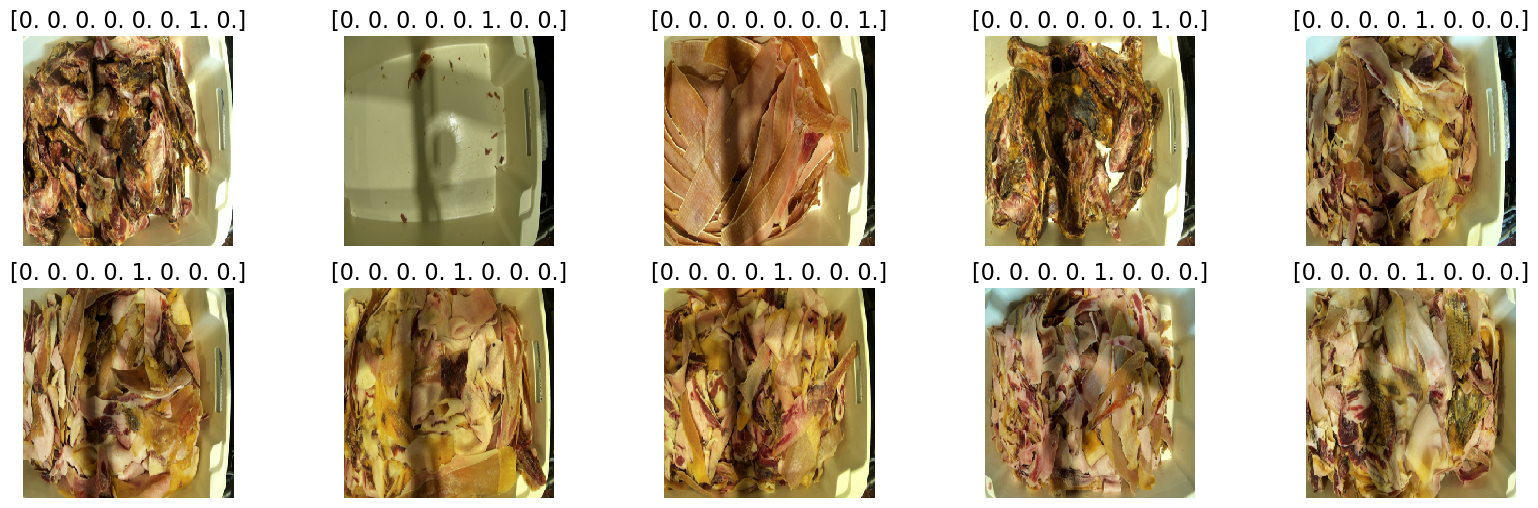

In [7]:
plots(imgs, titles=labels)

In [8]:
train_batches.class_indices

{'CLASS_01': 0,
 'CLASS_02': 1,
 'CLASS_03': 2,
 'CLASS_04': 3,
 'CLASS_05': 4,
 'CLASS_06': 5,
 'CLASS_07': 6,
 'CLASS_08': 7}

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
import tensorflow as tf

In [11]:
tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [12]:
vgg16_model = keras.applications.vgg16.VGG16()

In [13]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
type(vgg16_model)

keras.engine.functional.Functional

In [15]:
keras.engine.training.Model

keras.engine.training.Model

In [16]:
model = Sequential()
for i in vgg16_model.layers:
    model.add(i)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [18]:
model.layers.pop()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [19]:
for layer in model.layers:
    layer.trainable = False

In [20]:
model.add(Dense(8, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [22]:
model.compile(Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\andre\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [23]:
model.fit(train_batches, steps_per_epoch=1, validation_data=test_batches, validation_steps=10, epochs=20, verbose=2)

Epoch 1/20
1/1 - 16s - loss: 2.0813 - accuracy: 0.2000 - val_loss: 1.9603 - val_accuracy: 0.3500 - 16s/epoch - 16s/step
Epoch 2/20
1/1 - 12s - loss: 1.9957 - accuracy: 0.2000 - val_loss: 1.8829 - val_accuracy: 0.6250 - 12s/epoch - 12s/step
Epoch 3/20
1/1 - 18s - loss: 1.8779 - accuracy: 0.7000 - val_loss: 1.7405 - val_accuracy: 0.6250 - 18s/epoch - 18s/step
Epoch 4/20
1/1 - 16s - loss: 1.8356 - accuracy: 0.5000 - val_loss: 1.6149 - val_accuracy: 0.6750 - 16s/epoch - 16s/step
Epoch 5/20
1/1 - 15s - loss: 1.6362 - accuracy: 0.7000 - val_loss: 1.6196 - val_accuracy: 0.5750 - 15s/epoch - 15s/step
Epoch 6/20
1/1 - 12s - loss: 1.4385 - accuracy: 0.7000 - val_loss: 1.7070 - val_accuracy: 0.4750 - 12s/epoch - 12s/step
Epoch 7/20
1/1 - 13s - loss: 1.4877 - accuracy: 0.6000 - val_loss: 1.4621 - val_accuracy: 0.6250 - 13s/epoch - 13s/step
Epoch 8/20
1/1 - 16s - loss: 1.7219 - accuracy: 0.4000 - val_loss: 1.5355 - val_accuracy: 0.5500 - 16s/epoch - 16s/step
Epoch 9/20
1/1 - 13s - loss: 1.5575 - ac

In [24]:
model.save_weights('model_weights.h5')

[[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]
[[0.01366167 0.03096414 0.04018892 0.05710735 0.6952286  0.01865719
  0.11702207 0.02717011]
 [0.01267339 0.02570678 0.04335292 0.05465401 0.6701942  0.01762281
  0.15173043 0.02406543]
 [0.01311263 0.03238638 0.04456792 0.07123524 0.6130363  0.01821694
  0.18580525 0.02163936]
 [0.01220274 0.01995382 0.03768042 0.03621263 0.7381596  0.01702794
  0.1131124  0.02565037]]


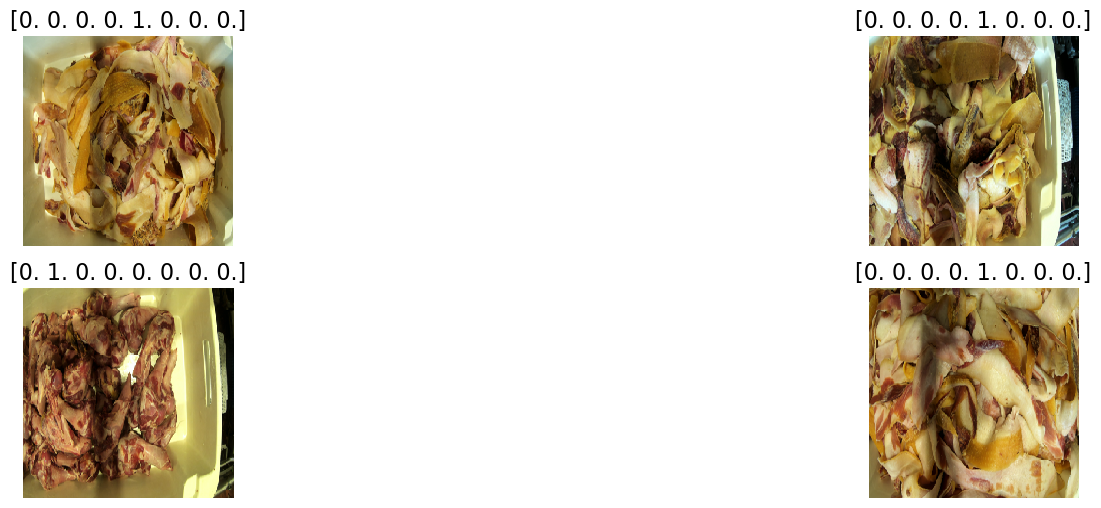

In [25]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)
print(test_labels)
predictions = model.predict_on_batch(np.array(test_imgs))
print(predictions)
test_labels = np.array(test_labels.argmax(axis=1))
predictions = np.array(predictions.argmax(axis=1))

In [26]:
print(test_labels)
print(predictions)

[4 4 1 4]
[4 4 4 4]


In [27]:
cm = confusion_matrix(test_labels, predictions)

In [28]:
cm_plot_labels = ['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']
if 0 not in test_labels and 0 not in predictions:
    cm_plot_labels.remove('CLASS_01')
if 1 not in test_labels and 1 not in predictions:
    cm_plot_labels.remove('CLASS_02')
if 2 not in test_labels and 2 not in predictions:
    cm_plot_labels.remove('CLASS_03')
if 3 not in test_labels and 3 not in predictions:
    cm_plot_labels.remove('CLASS_04')
if 4 not in test_labels and 4 not in predictions:
    cm_plot_labels.remove('CLASS_05')
if 5 not in test_labels and 5 not in predictions:
    cm_plot_labels.remove('CLASS_06')
if 6 not in test_labels and 6 not in predictions:
    cm_plot_labels.remove('CLASS_07')
if 7 not in test_labels and 7 not in predictions:
    cm_plot_labels.remove('CLASS_08')

Confusion matrix, without normalization
[[0 1]
 [0 3]]


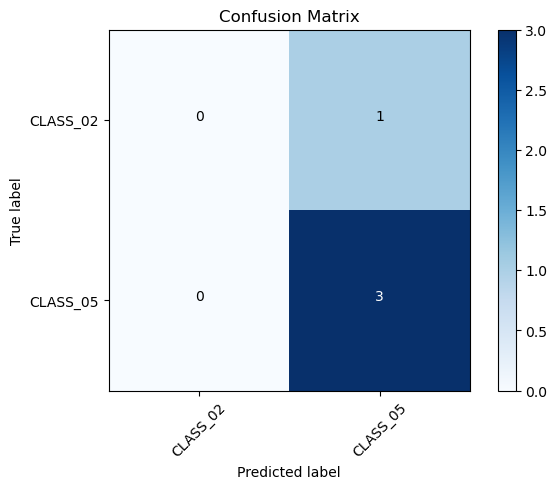

In [29]:
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')